In [ ]:
!pip install deap
!pip install yfinance
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import yfinance as yf

# List of tickers
stocks = ['BABA', 'TSM', 'NTES', 'RELIANCE.NS', 'TATAMOTORS.NS', 'BYDDF',
          'SAP', 'SIEGY', 'BP', 'ASML', 'HSBC', 'VWS.CO',
          'AAPL', 'MSFT', 'AMZN', 'TSLA', 'PFE', 'V',
          'CSL.AX', 'BHP.AX']
stocks_nordic = ['ERIC-B.ST', 'VOLV-B.ST', 'SPOT', 'DNB.OL', 'CARL-B.CO',
          'SAND.ST', 'NOK', 'TEL.OL', 'PNDORA.CO', 'NOVO-B.CO',
          'VWS.CO', 'ORNBV.HE', 'ORK.OL', 'ESSITY-B.ST', 'KNEBV.HE',
          'EQNR.OL', 'ORSTED.CO', 'HEXA-B.ST', 'GMAB.CO']

# Loop through each stock to fetch historical data from 2018
for ticker in stocks_nordic:
    stock_data = yf.download(ticker, start='2018-01-01', end='2024-11-13')
    if stock_data.empty:
        print(f"Data for {ticker} is not available from 2018.")
    else:
        print(f"Data for {ticker} is available from 2018.")


[*********************100%***********************]  1 of 1 completed


Data for ERIC-B.ST is available from 2018.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for VOLV-B.ST is available from 2018.
Data for SPOT is available from 2018.


[*********************100%***********************]  1 of 1 completed


Data for DNB.OL is available from 2018.


[*********************100%***********************]  1 of 1 completed


Data for CARL-B.CO is available from 2018.


[*********************100%***********************]  1 of 1 completed


Data for SAND.ST is available from 2018.


[*********************100%***********************]  1 of 1 completed


Data for NOK is available from 2018.


[*********************100%***********************]  1 of 1 completed


Data for TEL.OL is available from 2018.


[*********************100%***********************]  1 of 1 completed


Data for PNDORA.CO is available from 2018.


[*********************100%***********************]  1 of 1 completed


Data for NOVO-B.CO is available from 2018.


[*********************100%***********************]  1 of 1 completed


Data for VWS.CO is available from 2018.


[*********************100%***********************]  1 of 1 completed


Data for ORNBV.HE is available from 2018.


[*********************100%***********************]  1 of 1 completed


Data for ORK.OL is available from 2018.


[*********************100%***********************]  1 of 1 completed


Data for ESSITY-B.ST is available from 2018.


[*********************100%***********************]  1 of 1 completed


Data for KNEBV.HE is available from 2018.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Data for EQNR.OL is available from 2018.
Data for ORSTED.CO is available from 2018.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Data for HEXA-B.ST is available from 2018.
Data for GMAB.CO is available from 2018.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

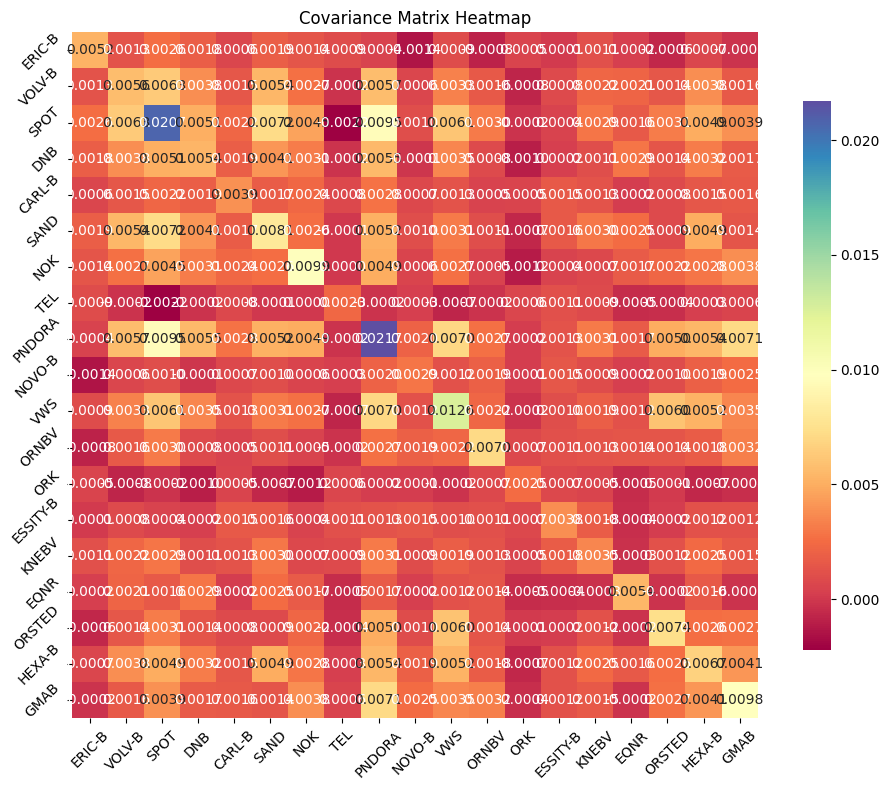

Covariance matrix saved to 'covariance_matrix.csv'.


In [ ]:
import random
import pandas as pd
import numpy as np
from deap import base, creator, tools
import yfinance as yf
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Step 1: Define the number of assets
number_of_assets = 20

# Example stock tickers
stocks_global = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META',
          'TSLA', 'BRK-B', 'JPM', 'JNJ', 'V',
          'PG', 'DIS', 'NFLX', 'NVDA', 'PYPL',
          'INTC', 'CMCSA', 'PEP', 'ADBE', 'CSCO']
stocks_global_2 = ['BABA', 'TSM', 'NTES', 'RELIANCE.NS', 'TATAMOTORS.NS', 'BYDDF',
          'SAP', 'SIEGY', 'BP', 'ASML', 'HSBC', 'VWS.CO',
          'AAPL', 'MSFT', 'AMZN', 'TSLA', 'PFE', 'V',
          'CSL.AX', 'BHP.AX']
stocks_nordic = ['ERIC-B.ST', 'VOLV-B.ST', 'SPOT', 'DNB.OL', 'CARL-B.CO',
          'SAND.ST', 'NOK', 'TEL.OL', 'PNDORA.CO', 'NOVO-B.CO',
          'VWS.CO', 'ORNBV.HE', 'ORK.OL', 'ESSITY-B.ST', 'KNEBV.HE',
          'EQNR.OL', 'ORSTED.CO', 'HEXA-B.ST', 'GMAB.CO']



# Specify the output directory and date range
output_dir = '/content/drive/MyDrive/stock_nordic'  # Update this path
start_date = "2018-01-01"
end_date = "2022-12-31"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Download and save the stock data
for stock in stocks_nordic:
    stock_data = yf.download(stock, start=start_date, end=end_date)
    # Reset index to have 'Date' as a regular column
    stock_data.reset_index(inplace=True)
    # Select only the specified columns
    stock_data = stock_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    # Save to CSV
    stock_data.to_csv(f"{output_dir}/{stock}.csv", index=False)

data_directory = '/content/drive/MyDrive/stock_nordic'  # Update this path

def load_data(directory):
    stock_data = {}
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            stock_name = filename.split('.')[0]
            file_path = os.path.join(directory, filename)
            # Read CSV file, set 'Date' as index, and sort by date
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date').sort_index()
            # Convert 'Close' column to numeric, coercing errors to NaN, then drop NaN values
            df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
            df = df.dropna(subset=['Close'])
            # Store only 'Close' column in dictionary with stock ticker as key
            stock_data[stock_name] = df['Close']

    # Combine all stocks into one DataFrame with 'Date' as common index
    all_data = pd.DataFrame(stock_data)

    # Reindex with the full date range (min to max dates across all data)
    full_date_range = pd.date_range(all_data.index.min(), all_data.index.max(), freq='D')
    all_data = all_data.reindex(full_date_range).sort_index().ffill()

    return all_data


# Load the data (update the directory path as needed)
#data_directory = '/content/drive/MyDrive/stock1'  # Replace with your directory
data = load_data(data_directory)
# Load the stock data
data = load_data(data_directory)


# Step 3: Calculate monthly returns
monthly_returns = data.resample('ME').ffill().pct_change().dropna()

# Step 4: Calculate Covariance Matrix
covariance_matrix = monthly_returns.cov()

plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, fmt='.4f', cmap='seismic', square=True, cbar_kws={"shrink": .8})
plt.title('Covariance Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, save the covariance matrix to a CSV
covariance_matrix.to_csv('covariance_matrix_global.csv')
print("Covariance matrix saved to 'covariance_matrix.csv'.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Run 1/10
Running Basic EP with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'tournament_size': 2}
Running Advanced EP with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'tournament_size': 2}
Running Basic ES with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'offspring_size': 100, 'tournament_size': 2}
Running Advanced ES with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'offspring_size': 100, 'tournament_size': 2}
Running (μ + λ) ES with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'mu': 50, 'lambda_': 100, 'tournament_size': 2}
Running (μ, λ) ES with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'mu': 50, 'lambda_': 100, 'tournament_size': 2}
Run 2/10
Running Basic EP with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'tournament_

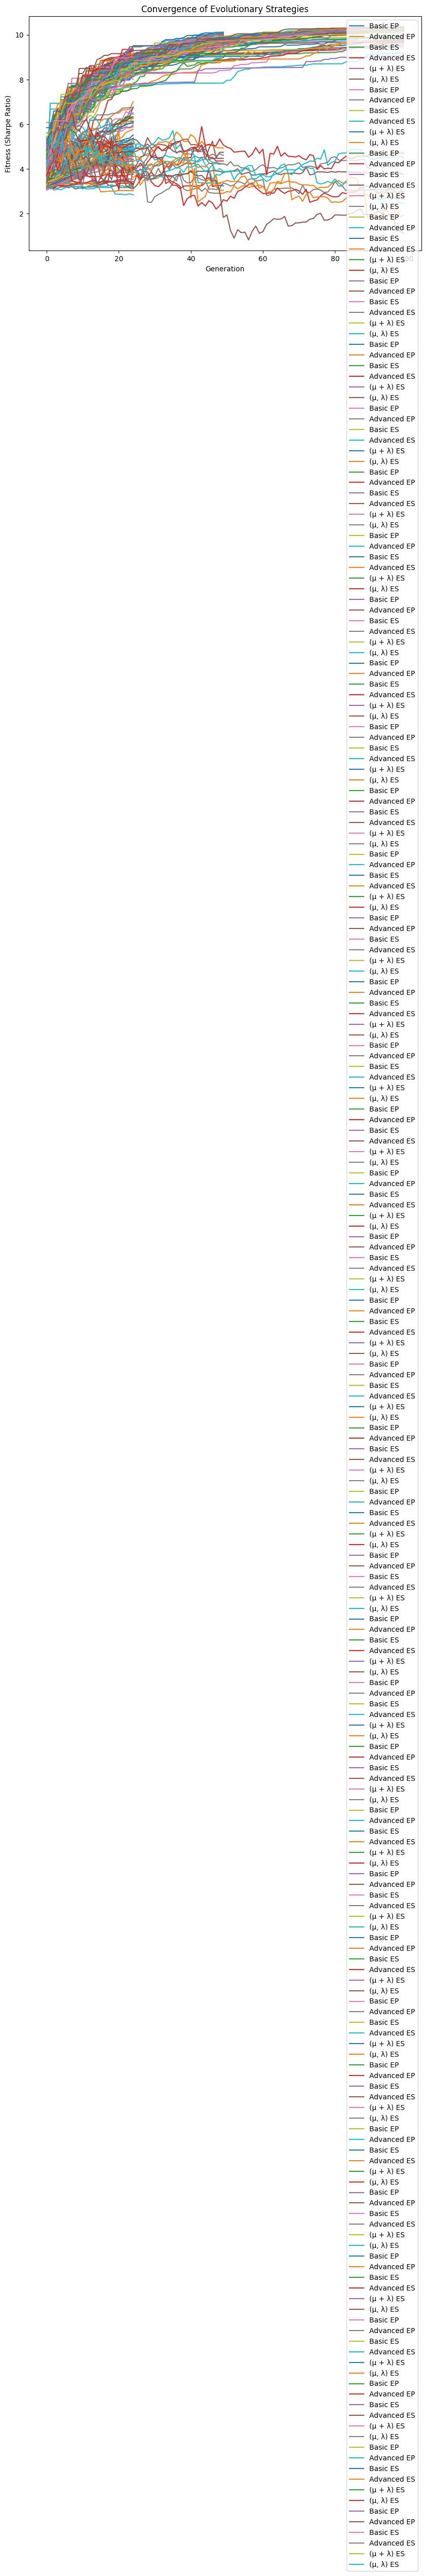

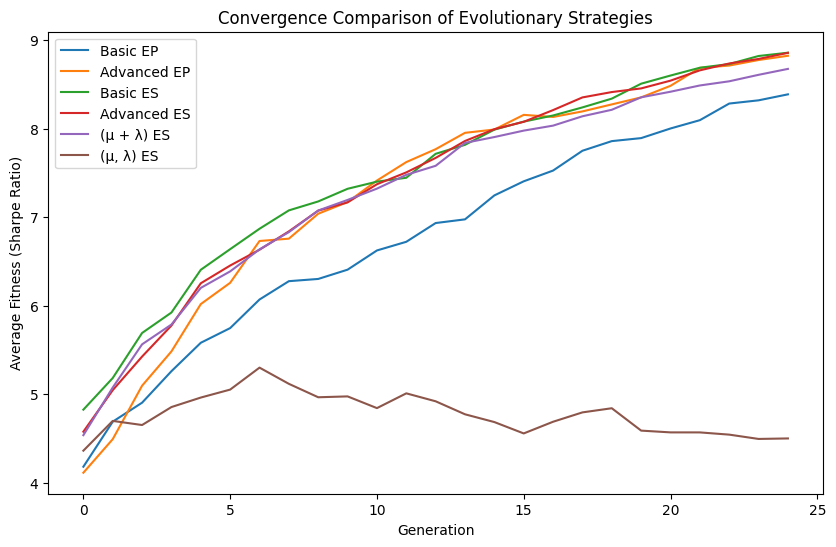

Convergence and stability results saved to CSV files.

Stability Analysis Results:
      Strategy  Average Final Fitness  Stability (Std Dev)
0     Basic EP               8.387236             0.397307
1  Advanced EP               8.822980             0.276648
2     Basic ES               8.857392             0.241316
3  Advanced ES               8.855990             0.252183
4   (μ + λ) ES               8.674721             0.232183
5    (μ, λ) ES               4.500503             0.482661

Summary of All Results:
        Strategy  Best Fitness  Mutation Rate  Sigma  Max Generations  \
0       Basic EP      6.134964           0.01   0.01               25   
1    Advanced EP      5.179725           0.01   0.01               25   
2       Basic ES      4.755873           0.01   0.01               25   
3    Advanced ES      5.128681           0.01   0.01               25   
4     (μ + λ) ES      5.123446           0.01   0.01               25   
..           ...           ...           

In [ ]:
import random
import pandas as pd
import numpy as np
from deap import base, creator, tools
import yfinance as yf
import matplotlib.pyplot as plt
import os

# Step 1: Define the number of assets
number_of_assets = 20

# Example stock tickers
stocks_global = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META',
          'TSLA', 'BRK-B', 'JPM', 'JNJ', 'V',
          'PG', 'DIS', 'NFLX', 'NVDA', 'PYPL',
          'INTC', 'CMCSA', 'PEP', 'ADBE', 'CSCO']

stocks_nordic = ['ERIC-B.ST', 'VOLV-B.ST', 'SPOT', 'DNB.OL', 'CARL-B.CO',
          'SAND.ST', 'NOK', 'TEL.OL', 'PNDORA.CO', 'NOVO-B.CO',
          'VWS.CO', 'ORNBV.HE', 'ORK.OL', 'ESSITY-B.ST', 'KNEBV.HE',
          'EQNR.OL', 'ORSTED.CO', 'HEXA-B.ST', 'GMAB.CO']

stocks_global2 = [
    # Asian Stocks (6)
    'BABA', 'TSM', 'NTES', 'RELIANCE.NS', 'TATAMOTORS.NS', 'BYDDF',  # China, Taiwan, India, Singapore

    # European Stocks (6)
    'SAP', 'SIEGY', 'BP', 'ASML', 'HSBC', 'VWS.CO',            # Germany, France, Netherlands, UK, Denmark

    # American Stocks (6)
    'AAPL', 'MSFT', 'AMZN', 'TSLA', 'PFE', 'V',                  # USA (Tech, Pharma, Finance, Consumer)

    # Australian Stocks (2)
    'CSL.AX', 'BHP.AX'                                             # Australia (Healthcare, Mining)
]


# Specify the output directory and date range
output_dir = '/content/drive/MyDrive/stock'  # Update this path
start_date = "2018-01-01"
end_date = "2022-12-31"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Download and save the stock data
for stock in stocks:
    stock_data = yf.download(stock, start=start_date, end=end_date)
    # Reset index to have 'Date' as a regular column
    stock_data.reset_index(inplace=True)
    # Select only the specified columns
    stock_data = stock_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    # Save to CSV
    stock_data.to_csv(f"{output_dir}/{stock}.csv", index=False)

data_directory = '/content/drive/MyDrive/stock'  # Update this path


# Download and save the stock data
for stock in stocks_nordic:
    stock_data = yf.download(stock, start=start_date, end=end_date)
    # Reset index to have 'Date' as a regular column
    stock_data.reset_index(inplace=True)
    # Select only the specified columns
    stock_data = stock_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    # Save to CSV
    stock_data.to_csv(f"{output_dir}/{stock}.csv", index=False)

data_directory = '/content/drive/MyDrive/stock'  # Update this path

# Download and save the stock data
for stock in stocks_global2:
    stock_data = yf.download(stock, start=start_date, end=end_date)
    # Reset index to have 'Date' as a regular column
    stock_data.reset_index(inplace=True)
    # Select only the specified columns
    stock_data = stock_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    # Save to CSV
    stock_data.to_csv(f"{output_dir}/{stock}.csv", index=False)

data_directory = '/content/drive/MyDrive/stock'  # Update this path


def load_data(directory):
    stock_data = {}
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            stock_name = filename.split('.')[0]
            file_path = os.path.join(directory, filename)
            # Read CSV file, set 'Date' as index, and sort by date
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date').sort_index()
            # Convert 'Close' column to numeric, coercing errors to NaN, then drop NaN values
            df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
            df = df.dropna(subset=['Close'])
            # Store only 'Close' column in dictionary with stock ticker as key
            stock_data[stock_name] = df['Close']

    # Combine all stocks into one DataFrame with 'Date' as common index
    all_data = pd.DataFrame(stock_data)

    # Reindex with the full date range (min to max dates across all data)
    full_date_range = pd.date_range(all_data.index.min(), all_data.index.max(), freq='D')
    all_data = all_data.reindex(full_date_range).sort_index().ffill()

    return all_data


# Load the data (update the directory path as needed)
#data_directory = '/content/drive/MyDrive/stock'  # Replace with your directory
data = load_data(data_directory)
# Load the stock data
data = load_data(data_directory)


# Step 3: Calculate monthly returns
monthly_returns = data.resample('ME').ffill().pct_change().dropna()

# Step 4: Calculate Covariance Matrix
covariance_matrix = monthly_returns.cov()

# Step 5: Define Fitness and Individual classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximize return
creator.create("Individual", list, fitness=creator.FitnessMax)

# Step 6: Function to initialize an individual
def init_individual():
    individual = [random.random() for _ in range(number_of_assets)]
    total_weight = sum(individual)
    individual = [w / total_weight for w in individual]
    return individual

# Step 7: Register toolbox functions
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, init_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Step 8: Define the evaluation functions
def sharpe_ratio(weights):
    weights = np.array(weights)  # Convert to numpy array
    if weights.shape != (number_of_assets,):
        raise ValueError(f"Expected weights shape {number_of_assets}, but got {weights.shape}")

    portfolio_return = np.dot(monthly_returns.mean().values, weights) * 252  # Annualized return
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix.values * 252, weights)))  # Annualized volatility

    if portfolio_std == 0:  # Prevent division by zero
        return -np.inf,  # Return a very low fitness value if the risk is zero

    return (portfolio_return - 0.01) / portfolio_std,  # Assume risk-free rate of 1%
def sortino_ratio(weights):
    weights = np.array(weights)
    if weights.shape != (number_of_assets,):
        raise ValueError(f"Expected weights shape {number_of_assets}, but got {weights.shape}")

    portfolio_return = np.dot(monthly_returns.mean().values, weights) * 252  # Annualized return
    downside_returns = monthly_returns[monthly_returns < 0].mean().values
    downside_std = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix.values * 252, weights)))  # Annualized downside risk

    if downside_std == 0:  # Prevent division by zero
        return -np.inf,  # Return a very low fitness value if the risk is zero

    return (portfolio_return - 0.01) / downside_std,  # Assume risk-free rate of 1%

def portfolio_return(weights):
    weights = np.array(weights)
    if weights.shape != (number_of_assets,):
        raise ValueError(f"Expected weights shape {number_of_assets}, but got {weights.shape}")

    return np.dot(monthly_returns.mean().values, weights) * 252,  # Annualized return



# Register evaluation functions for different strategies
toolbox.register("evaluate_sharpe", sharpe_ratio)
toolbox.register("evaluate_sortino", sortino_ratio)
toolbox.register("evaluate_return", portfolio_return)

toolbox.register("mate", tools.cxBlend, alpha=0.5)

# Step 9: Adaptive Mutation Rate Function
def adaptive_mutation_rate(current_gen, max_gen, min_rate=0.01, max_rate=0.5):
    return max_rate - (max_rate - min_rate) * (current_gen / max_gen)

# Mutation function with adaptive sigma
def mutate(individual, gen, max_gen, sigma):
    mutation_rate = adaptive_mutation_rate(gen, max_gen)
    return tools.mutGaussian(individual, mu=0, sigma=sigma, indpb=mutation_rate)

toolbox.register("mutate", mutate)
toolbox.register("select", tools.selTournament, tournsize=3)

# Step 10: Basic Evolutionary Programming (EP)
def run_basic_ep(max_gen=25, mutation_rate=0.2, sigma=0.1, population_size=50, tournament_size=3):
    population = toolbox.population(n=population_size)
    stats = {'gen': [], 'max': []}

    # Evaluate initial population using Sharpe Ratio
    fitnesses = list(map(toolbox.evaluate_sharpe, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.5:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutation_rate:
                toolbox.mutate(mutant, gen, max_gen, sigma)
                del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate_sharpe, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Replace the old population by offspring
        population[:] = offspring

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)

    return stats

# Repeat similar structures for Advanced EP, Basic ES, Advanced ES, and other strategies
# Here is one example for Advanced Evolutionary Programming (EP)
def run_advanced_ep(max_gen=25, mutation_rate=0.2, sigma=0.1, population_size=50, tournament_size=3):
    population = toolbox.population(n=population_size)
    stats = {'gen': [], 'max': []}

    fitnesses = list(map(toolbox.evaluate_sharpe, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Selection with elitism
        offspring = tools.selBest(population, k=10) + toolbox.select(population, len(population)-10)
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.5:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutation_rate:
                toolbox.mutate(mutant, gen, max_gen, sigma)
                del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate_sharpe, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        population[:] = offspring

        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)

    return stats


    # Step 12: Basic Evolutionary Strategies (ES)
def run_basic_es(max_gen=25, mutation_rate=0.2, sigma=0.1, population_size=50, offspring_size=100, tournament_size=3):
    toolbox.register("select", tools.selTournament, tournsize=tournament_size)  # Set tournament size
    population = toolbox.population(n=population_size)
    stats = {'gen': [], 'max': []}

    # Evaluate initial population
    fitnesses = list(map(toolbox.evaluate_sharpe, population))
   # fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Create offspring
        offspring = tools.selRandom(population, offspring_size)
        offspring = list(map(toolbox.clone, offspring))

        for mutant in offspring:
            toolbox.mutate(mutant, gen, max_gen, sigma)
            del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
       # fitnesses = map(toolbox.evaluate, invalid_ind)
        fitnesses = map(toolbox.evaluate_sharpe, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation from parents and offspring
        population = tools.selBest(population + offspring, population_size)

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)

    return stats

# Step 13: Advanced Evolutionary Strategies (ES)
def run_advanced_es(max_gen=25, mutation_rate=0.2, sigma=0.1, population_size=50, offspring_size=100, tournament_size=3):
    toolbox.register("select", tools.selTournament, tournsize=tournament_size)  # Set tournament size
    population = toolbox.population(n=population_size)
    stats = {'gen': [], 'max': []}

    # Evaluate initial population
   # fitnesses = list(map(toolbox.evaluate, population))

    fitnesses = list(map(toolbox.evaluate_sharpe, population))

    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Create offspring
        offspring = tools.selRandom(population, offspring_size)
        offspring = list(map(toolbox.clone, offspring))

        for mutant in offspring:
            toolbox.mutate(mutant, gen, max_gen, sigma)
            del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
       #fitnesses = map(toolbox.evaluate, invalid_ind)
        fitnesses = map(toolbox.evaluate_sharpe, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation from parents and offspring
        population = tools.selBest(population + offspring, population_size)

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)

    return stats

# Step 14: (μ + λ) Evolutionary Strategies
def run_mu_plus_lambda_es(max_gen=25, mutation_rate=0.2, sigma=0.1, mu=50, lambda_=100, tournament_size=3):
    toolbox.register("select", tools.selTournament, tournsize=tournament_size)  # Set tournament size
    population = toolbox.population(n=mu)
    stats = {'gen': [], 'max': []}

    # Evaluate initial population
    #fitnesses = list(map(toolbox.evaluate, population))
    fitnesses = list(map(toolbox.evaluate_sharpe, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Create offspring
        offspring = tools.selRandom(population, lambda_)
        offspring = list(map(toolbox.clone, offspring))

        for mutant in offspring:
            toolbox.mutate(mutant, gen, max_gen, sigma)  # Use the passed sigma
            del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
      # fitnesses = map(toolbox.evaluate, invalid_ind)
        fitnesses = map(toolbox.evaluate_sharpe, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation from parents and offspring
        population = tools.selBest(population + offspring, mu)

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)

    return stats

# Step 15: (μ, λ) Evolutionary Strategies
def run_mu_comma_lambda_es(max_gen=25, mutation_rate=0.2, sigma=0.1, mu=50, lambda_=100, tournament_size=3):
    toolbox.register("select", tools.selTournament, tournsize=tournament_size)  # Set tournament size
    population = toolbox.population(n=mu)
    stats = {'gen': [], 'max': []}

    # Evaluate initial population
   # fitnesses = list(map(toolbox.evaluate, population))
    fitnesses = list(map(toolbox.evaluate_sharpe, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Create offspring
        offspring = tools.selRandom(population, lambda_)
        offspring = list(map(toolbox.clone, offspring))

        for mutant in offspring:
            toolbox.mutate(mutant, gen, max_gen, sigma)  # Use the passed sigma
            del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
      # fitnesses = map(toolbox.evaluate, invalid_ind)
        fitnesses = map(toolbox.evaluate_sharpe, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation only from offspring
        population[:] = offspring

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)

    return stats


# Step 14: Load parameters from CSV
params_df = pd.read_csv('/content/drive/MyDrive/parametersold.csv')  # Replace with your CSV path

# Step 15: Experimentation Loop with Convergence and Stability Tracking
results = []
results1 = []
convergence_data = {}  # Track convergence for each strategy
stability_data = {}    # Track final fitness values for each strategy

num_runs = 10  # Number of times to run each strategy

# Iterate over parameters from the CSV file
for index, row in params_df.iterrows():
    mutation_rate = row['mutation_rate']
    sigma = row['sigma']
    max_gen = int(row['max_gen'])
    population_size = int(row['population_size'])
    offspring_size = int(row['offspring_size'])
    tournament_size = int(row['tournament_size'])

    strategies = [
        ("Basic EP", run_basic_ep, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "population_size": population_size, "tournament_size": tournament_size}),
        ("Advanced EP", run_advanced_ep, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "population_size": population_size, "tournament_size": tournament_size}),
        ("Basic ES", run_basic_es, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "population_size": population_size, "offspring_size": offspring_size, "tournament_size": tournament_size}),
        ("Advanced ES", run_advanced_es, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "population_size": population_size, "offspring_size": offspring_size, "tournament_size": tournament_size}),
        ("(μ + λ) ES", run_mu_plus_lambda_es, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "mu": population_size, "lambda_": offspring_size, "tournament_size": tournament_size}),
        ("(μ, λ) ES", run_mu_comma_lambda_es, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "mu": population_size, "lambda_": offspring_size, "tournament_size": tournament_size})
    ]


    # Initialize lists for stability and convergence tracking
    for label, _, _ in strategies:
        convergence_data[label] = []
        stability_data[label] = []

    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs}")

        for label, strategy_func, params in strategies:
            print(f"Running {label} with parameters: {params}")
            stats = strategy_func(**params)  # Unpack parameters specific to each function
            results.append((stats, label, mutation_rate, sigma, max_gen, population_size, offspring_size, tournament_size))
            results1.append({
                "Strategy": label,
                "Run": run + 1,
                "Mutation Rate": mutation_rate,
                "Sigma": sigma,
                "Max Generations": max_gen,
                "Population Size": population_size,
                "Offspring Size": offspring_size,
                "Tournament Size": tournament_size,
                "Convergence": stats['max'],  # Entire convergence list
                "Final Fitness": stats['max'][-1]  # Final fitness value in the convergence data
            })



            # Track convergence for this run
            convergence_data[label].append(stats['max'])
            # Track final fitness for stability
            stability_data[label].append(stats['max'][-1])

results1_df = pd.DataFrame(results1)
results1_df.to_csv("sharpe_results1.csv", index=False)
print("Results for each run have been saved to 'experiment_results.csv'")

# Step 18: Plot results for each strategy
def plot_convergence(stats, label):
    plt.plot(stats['gen'], stats['max'], label=label)

plt.figure(figsize=(10, 6))
for result in results:
    stats, label, mutation_rate, sigma, max_gen, population_size, offspring_size, tournament_size = result
    plot_convergence(stats, label)

plt.title('Convergence of Evolutionary Strategies')
plt.xlabel('Generation')
plt.ylabel('Fitness (Sharpe Ratio)')
plt.legend()
plt.show()

# Step 18: Plot Convergence Comparison
def plot_average_convergence(data, label):
    # Calculate average fitness over generations
    avg_convergence = np.mean(data, axis=0)
    plt.plot(avg_convergence, label=label)

plt.figure(figsize=(10, 6))
for label in convergence_data.keys():
    plot_average_convergence(convergence_data[label], label)

plt.title('Convergence Comparison of Evolutionary Strategies')
plt.xlabel('Generation')
plt.ylabel('Average Fitness (Sharpe Ratio)')
plt.legend()
plt.show()
convergence_results = []
for res in results:
    stats, label, mutation_rate, sigma, max_gen, population_size, offspring_size, tournament_size = res
    for gen, fitness in zip(stats['gen'], stats['max']):
        convergence_results.append({
            'Strategy': label,
            'Mutation Rate': mutation_rate,
            'Sigma': sigma,
            'Population Size': population_size,
            'Offspring Size': offspring_size,
            'Tournament Size': tournament_size,
            'Generation': gen,
            'Fitness': fitness
        })

convergence_df = pd.DataFrame(convergence_results)
convergence_df.to_csv('convergence_results.csv', index=False)

# Prepare DataFrame for Stability Results
stability_results = []
strategies = set([r[1] for r in results])  # Unique strategies

for strategy in strategies:
    strategy_fitness = [max(r[0]['max']) for r in results if r[1] == strategy]
    mean_fitness = pd.Series(strategy_fitness).mean()
    std_dev_fitness = pd.Series(strategy_fitness).std()
    best_fitness = max(strategy_fitness)

    stability_results.append({
        'Strategy': strategy,
        'Mean Fitness': mean_fitness,
        'Std Dev Fitness': std_dev_fitness,
        'Best Fitness': best_fitness
    })

stability_df = pd.DataFrame(stability_results)
stability_df.to_csv('stability_results.csv', index=False)

print("Convergence and stability results saved to CSV files.")

# Step 19: Stability Analysis
stability_results1 = []
for label, final_fitness_list in stability_data.items():
    avg_fitness = np.mean(final_fitness_list)
    fitness_std = np.std(final_fitness_list)  # Stability indicator (standard deviation)
    stability_results1.append({
        'Strategy': label,
        'Average Final Fitness': avg_fitness,
        'Stability (Std Dev)': fitness_std
    })

stability_df = pd.DataFrame(stability_results1)
stability_df.to_csv('stability_results1.csv', index=False)
print("\nStability Analysis Results:")
print(stability_df)

# Step 20: Summarize Results
summary_results = []
for res in results:
    stats, label, mutation_rate, sigma, max_gen, population_size, offspring_size, tournament_size = res
    best_fitness = max(stats['max'])
    summary_results.append({
        'Strategy': label,
        'Best Fitness': best_fitness,
        'Mutation Rate': mutation_rate,
        'Sigma': sigma,
        'Max Generations': max_gen,
        'Population Size': population_size,
        'Offspring Size': offspring_size,
        'Tournament Size': tournament_size
    })

summary_df = pd.DataFrame(summary_results)
stability_df.to_csv('summary_results.csv', index=False)
print("\nSummary of All Results:")
print(summary_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Run 1/10
Running Basic EP with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'tournament_size': 2}
Running Advanced EP with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'tournament_size': 2}
Running Basic ES with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'offspring_size': 100, 'tournament_size': 2}
Running Advanced ES with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'offspring_size': 100, 'tournament_size': 2}
Running (μ + λ) ES with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'mu': 50, 'lambda_': 100, 'tournament_size': 2}
Running (μ, λ) ES with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'mu': 50, 'lambda_': 100, 'tournament_size': 2}
Run 2/10
Running Basic EP with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'tournament_

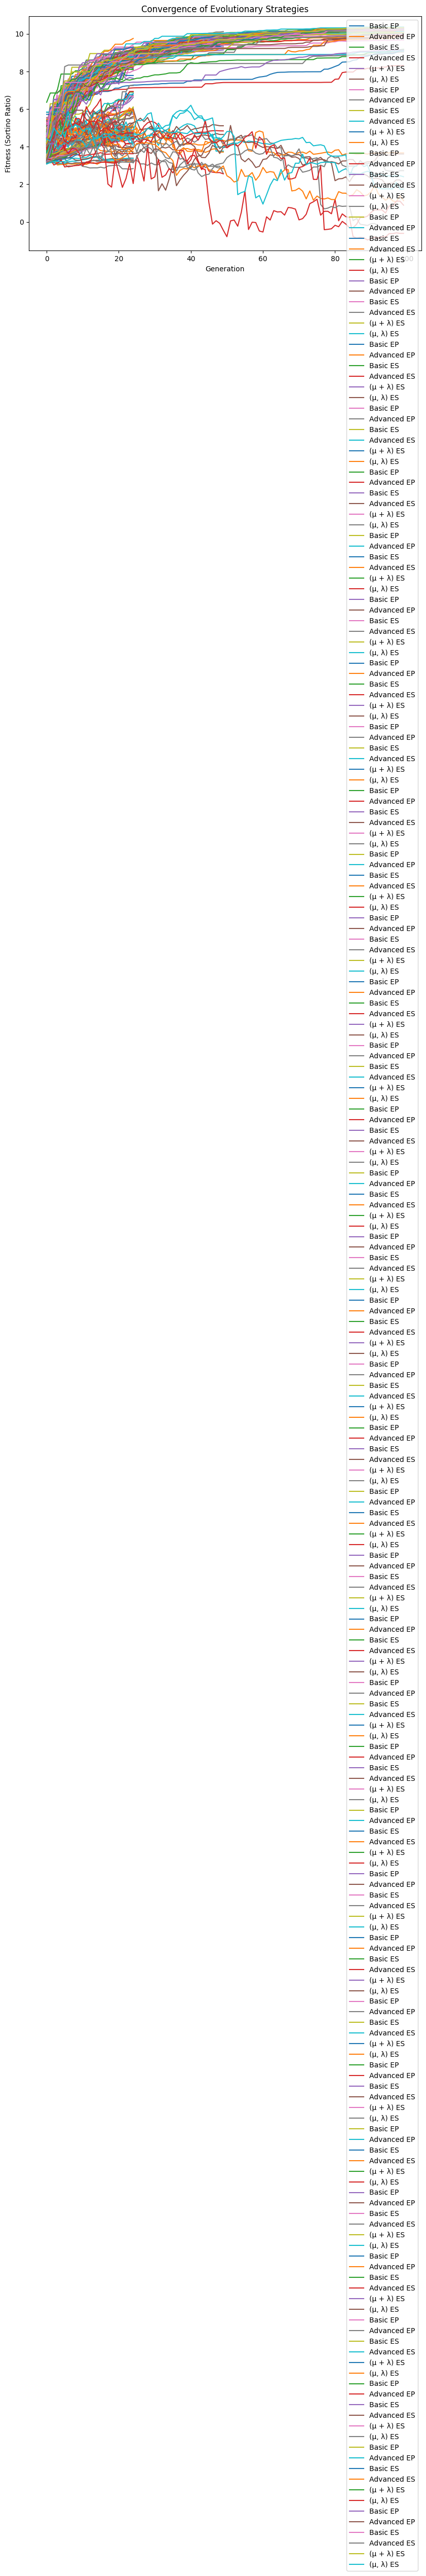

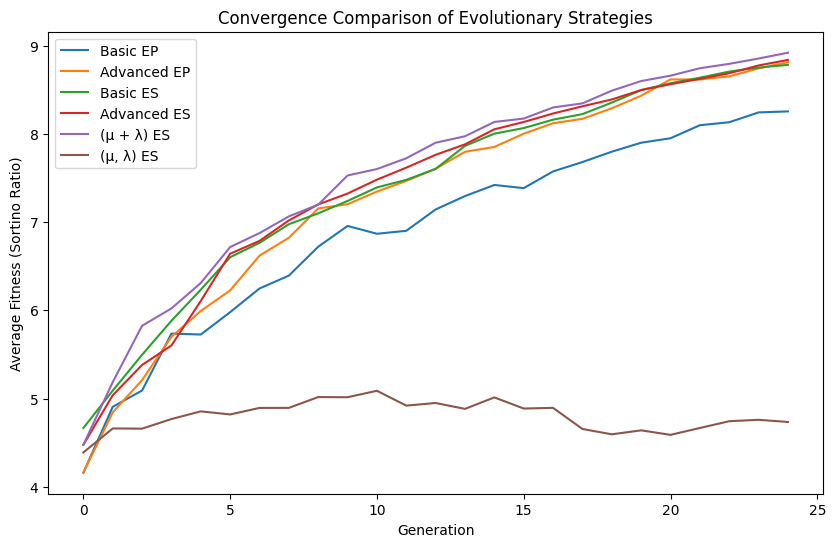

Convergence and stability results saved to CSV files.

Stability Analysis Results:
      Strategy  Average Final Fitness  Stability (Std Dev)
0     Basic EP               8.255813             0.411620
1  Advanced EP               8.813787             0.410028
2     Basic ES               8.783766             0.280239
3  Advanced ES               8.839394             0.242182
4   (μ + λ) ES               8.921179             0.284323
5    (μ, λ) ES               4.733763             0.952884

Summary of All Results:
        Strategy  Best Fitness  Mutation Rate  Sigma  Max Generations  \
0       Basic EP      6.709422           0.01   0.01               25   
1    Advanced EP      5.023798           0.01   0.01               25   
2       Basic ES      4.471317           0.01   0.01               25   
3    Advanced ES      5.066647           0.01   0.01               25   
4     (μ + λ) ES      4.751998           0.01   0.01               25   
..           ...           ...           

In [ ]:
import random
import pandas as pd
import numpy as np
from deap import base, creator, tools
import yfinance as yf
import matplotlib.pyplot as plt
import os

# Step 1: Define the number of assets
number_of_assets = 20

# Example stock tickers
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META',
          'TSLA', 'BRK-B', 'JPM', 'JNJ', 'V',
          'PG', 'DIS', 'NFLX', 'NVDA', 'PYPL',
          'INTC', 'CMCSA', 'PEP', 'ADBE', 'CSCO']



# Specify the output directory and date range
output_dir = '/content/drive/MyDrive/stock'  # Update this path
start_date = "2018-01-01"
end_date = "2022-12-31"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Download and save the stock data
for stock in stocks:
    stock_data = yf.download(stock, start=start_date, end=end_date)
    # Reset index to have 'Date' as a regular column
    stock_data.reset_index(inplace=True)
    # Select only the specified columns
    stock_data = stock_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    # Save to CSV
    stock_data.to_csv(f"{output_dir}/{stock}.csv", index=False)

data_directory = '/content/drive/MyDrive/stock'  # Update this path

def load_data(directory):
    stock_data = {}
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            stock_name = filename.split('.')[0]
            file_path = os.path.join(directory, filename)
            # Read CSV file, set 'Date' as index, and sort by date
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date').sort_index()
            # Convert 'Close' column to numeric, coercing errors to NaN, then drop NaN values
            df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
            df = df.dropna(subset=['Close'])
            # Store only 'Close' column in dictionary with stock ticker as key
            stock_data[stock_name] = df['Close']

    # Combine all stocks into one DataFrame with 'Date' as common index
    all_data = pd.DataFrame(stock_data)

    # Reindex with the full date range (min to max dates across all data)
    full_date_range = pd.date_range(all_data.index.min(), all_data.index.max(), freq='D')
    all_data = all_data.reindex(full_date_range).sort_index().ffill()

    return all_data


# Load the data (update the directory path as needed)
#data_directory = '/content/drive/MyDrive/stock'  # Replace with your directory
data = load_data(data_directory)
# Load the stock data
data = load_data(data_directory)


# Step 3: Calculate monthly returns
monthly_returns = data.resample('ME').ffill().pct_change().dropna()

# Step 4: Calculate Covariance Matrix
covariance_matrix = monthly_returns.cov()

# Step 5: Define Fitness and Individual classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximize return
creator.create("Individual", list, fitness=creator.FitnessMax)

# Step 6: Function to initialize an individual
def init_individual():
    individual = [random.random() for _ in range(number_of_assets)]
    total_weight = sum(individual)
    individual = [w / total_weight for w in individual]
    return individual

# Step 7: Register toolbox functions
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, init_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Step 8: Define the evaluation functions
def sharpe_ratio(weights):
    weights = np.array(weights)  # Convert to numpy array
    if weights.shape != (number_of_assets,):
        raise ValueError(f"Expected weights shape {number_of_assets}, but got {weights.shape}")

    portfolio_return = np.dot(monthly_returns.mean().values, weights) * 252  # Annualized return
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix.values * 252, weights)))  # Annualized volatility

    if portfolio_std == 0:  # Prevent division by zero
        return -np.inf,  # Return a very low fitness value if the risk is zero

    return (portfolio_return - 0.01) / portfolio_std,  # Assume risk-free rate of 1%
def sortino_ratio(weights):
    weights = np.array(weights)
    if weights.shape != (number_of_assets,):
        raise ValueError(f"Expected weights shape {number_of_assets}, but got {weights.shape}")

    portfolio_return = np.dot(monthly_returns.mean().values, weights) * 252  # Annualized return
    downside_returns = monthly_returns[monthly_returns < 0].mean().values
    downside_std = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix.values * 252, weights)))  # Annualized downside risk

    if downside_std == 0:  # Prevent division by zero
        return -np.inf,  # Return a very low fitness value if the risk is zero

    return (portfolio_return - 0.01) / downside_std,  # Assume risk-free rate of 1%

def portfolio_return(weights):
    weights = np.array(weights)
    if weights.shape != (number_of_assets,):
        raise ValueError(f"Expected weights shape {number_of_assets}, but got {weights.shape}")

    return np.dot(monthly_returns.mean().values, weights) * 252,  # Annualized return



# Register evaluation functions for different strategies
toolbox.register("evaluate_sharpe", sharpe_ratio)
toolbox.register("evaluate_sortino", sortino_ratio)
toolbox.register("evaluate_return", portfolio_return)

toolbox.register("mate", tools.cxBlend, alpha=0.5)

# Step 9: Adaptive Mutation Rate Function
def adaptive_mutation_rate(current_gen, max_gen, min_rate=0.01, max_rate=0.5):
    return max_rate - (max_rate - min_rate) * (current_gen / max_gen)

# Mutation function with adaptive sigma
def mutate(individual, gen, max_gen, sigma):
    mutation_rate = adaptive_mutation_rate(gen, max_gen)
    return tools.mutGaussian(individual, mu=0, sigma=sigma, indpb=mutation_rate)

toolbox.register("mutate", mutate)
toolbox.register("select", tools.selTournament, tournsize=3)

# Step 10: Basic Evolutionary Programming (EP)
def run_basic_ep(max_gen=25, mutation_rate=0.2, sigma=0.1, population_size=50, tournament_size=3):
    population = toolbox.population(n=population_size)
    stats = {'gen': [], 'max': []}

    # Evaluate initial population using Sortino Ratio
    fitnesses = list(map(toolbox.evaluate_sortino, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.5:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutation_rate:
                toolbox.mutate(mutant, gen, max_gen, sigma)
                del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate_sortino, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Replace the old population by offspring
        population[:] = offspring

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)

    return stats

# Repeat similar structures for Advanced EP, Basic ES, Advanced ES, and other strategies
# Here is one example for Advanced Evolutionary Programming (EP)
def run_advanced_ep(max_gen=25, mutation_rate=0.2, sigma=0.1, population_size=50, tournament_size=3):
    population = toolbox.population(n=population_size)
    stats = {'gen': [], 'max': []}

    fitnesses = list(map(toolbox.evaluate_sortino, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Selection with elitism
        offspring = tools.selBest(population, k=10) + toolbox.select(population, len(population)-10)
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.5:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutation_rate:
                toolbox.mutate(mutant, gen, max_gen, sigma)
                del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate_sharpe, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        population[:] = offspring

        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)

    return stats


    # Step 12: Basic Evolutionary Strategies (ES)
def run_basic_es(max_gen=25, mutation_rate=0.2, sigma=0.1, population_size=50, offspring_size=100, tournament_size=3):
    toolbox.register("select", tools.selTournament, tournsize=tournament_size)  # Set tournament size
    population = toolbox.population(n=population_size)
    stats = {'gen': [], 'max': []}

    # Evaluate initial population
    fitnesses = list(map(toolbox.evaluate_sortino, population))
   # fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Create offspring
        offspring = tools.selRandom(population, offspring_size)
        offspring = list(map(toolbox.clone, offspring))

        for mutant in offspring:
            toolbox.mutate(mutant, gen, max_gen, sigma)
            del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
       # fitnesses = map(toolbox.evaluate, invalid_ind)
        fitnesses = map(toolbox.evaluate_sharpe, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation from parents and offspring
        population = tools.selBest(population + offspring, population_size)

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)

    return stats

# Step 13: Advanced Evolutionary Strategies (ES)
def run_advanced_es(max_gen=25, mutation_rate=0.2, sigma=0.1, population_size=50, offspring_size=100, tournament_size=3):
    toolbox.register("select", tools.selTournament, tournsize=tournament_size)  # Set tournament size
    population = toolbox.population(n=population_size)
    stats = {'gen': [], 'max': []}

    # Evaluate initial population
   # fitnesses = list(map(toolbox.evaluate, population))

    fitnesses = list(map(toolbox.evaluate_sortino, population))

    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Create offspring
        offspring = tools.selRandom(population, offspring_size)
        offspring = list(map(toolbox.clone, offspring))

        for mutant in offspring:
            toolbox.mutate(mutant, gen, max_gen, sigma)
            del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
       #fitnesses = map(toolbox.evaluate, invalid_ind)
        fitnesses = map(toolbox.evaluate_sharpe, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation from parents and offspring
        population = tools.selBest(population + offspring, population_size)

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)

    return stats

# Step 14: (μ + λ) Evolutionary Strategies
def run_mu_plus_lambda_es(max_gen=25, mutation_rate=0.2, sigma=0.1, mu=50, lambda_=100, tournament_size=3):
    toolbox.register("select", tools.selTournament, tournsize=tournament_size)  # Set tournament size
    population = toolbox.population(n=mu)
    stats = {'gen': [], 'max': []}

    # Evaluate initial population
    #fitnesses = list(map(toolbox.evaluate, population))
    fitnesses = list(map(toolbox.evaluate_sortino, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Create offspring
        offspring = tools.selRandom(population, lambda_)
        offspring = list(map(toolbox.clone, offspring))

        for mutant in offspring:
            toolbox.mutate(mutant, gen, max_gen, sigma)  # Use the passed sigma
            del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
      # fitnesses = map(toolbox.evaluate, invalid_ind)
        fitnesses = map(toolbox.evaluate_sharpe, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation from parents and offspring
        population = tools.selBest(population + offspring, mu)

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)

    return stats

# Step 15: (μ, λ) Evolutionary Strategies
def run_mu_comma_lambda_es(max_gen=25, mutation_rate=0.2, sigma=0.1, mu=50, lambda_=100, tournament_size=3):
    toolbox.register("select", tools.selTournament, tournsize=tournament_size)  # Set tournament size
    population = toolbox.population(n=mu)
    stats = {'gen': [], 'max': []}

    # Evaluate initial population
   # fitnesses = list(map(toolbox.evaluate, population))
    fitnesses = list(map(toolbox.evaluate_sortino, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Create offspring
        offspring = tools.selRandom(population, lambda_)
        offspring = list(map(toolbox.clone, offspring))

        for mutant in offspring:
            toolbox.mutate(mutant, gen, max_gen, sigma)  # Use the passed sigma
            del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
      # fitnesses = map(toolbox.evaluate, invalid_ind)
        fitnesses = map(toolbox.evaluate_sharpe, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation only from offspring
        population[:] = offspring

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)

    return stats


# Step 14: Load parameters from CSV
params_df = pd.read_csv('/content/drive/MyDrive/parametersold.csv')  # Replace with your CSV path

# Step 15: Experimentation Loop with Convergence and Stability Tracking
results = []
results1 = []
convergence_data = {}  # Track convergence for each strategy
stability_data = {}    # Track final fitness values for each strategy

num_runs = 10  # Number of times to run each strategy

# Iterate over parameters from the CSV file
for index, row in params_df.iterrows():
    mutation_rate = row['mutation_rate']
    sigma = row['sigma']
    max_gen = int(row['max_gen'])
    population_size = int(row['population_size'])
    offspring_size = int(row['offspring_size'])
    tournament_size = int(row['tournament_size'])

    strategies = [
        ("Basic EP", run_basic_ep, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "population_size": population_size, "tournament_size": tournament_size}),
        ("Advanced EP", run_advanced_ep, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "population_size": population_size, "tournament_size": tournament_size}),
        ("Basic ES", run_basic_es, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "population_size": population_size, "offspring_size": offspring_size, "tournament_size": tournament_size}),
        ("Advanced ES", run_advanced_es, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "population_size": population_size, "offspring_size": offspring_size, "tournament_size": tournament_size}),
        ("(μ + λ) ES", run_mu_plus_lambda_es, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "mu": population_size, "lambda_": offspring_size, "tournament_size": tournament_size}),
        ("(μ, λ) ES", run_mu_comma_lambda_es, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "mu": population_size, "lambda_": offspring_size, "tournament_size": tournament_size})
    ]


    # Initialize lists for stability and convergence tracking
    for label, _, _ in strategies:
        convergence_data[label] = []
        stability_data[label] = []

    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs}")

        for label, strategy_func, params in strategies:
            print(f"Running {label} with parameters: {params}")
            stats = strategy_func(**params)  # Unpack parameters specific to each function
            results.append((stats, label, mutation_rate, sigma, max_gen, population_size, offspring_size, tournament_size))
            results1.append({
                "Strategy": label,
                "Run": run + 1,
                "Mutation Rate": mutation_rate,
                "Sigma": sigma,
                "Max Generations": max_gen,
                "Population Size": population_size,
                "Offspring Size": offspring_size,
                "Tournament Size": tournament_size,
                "Convergence": stats['max'],  # Entire convergence list
                "Final Fitness": stats['max'][-1]  # Final fitness value in the convergence data
            })


            # Track convergence for this run
            convergence_data[label].append(stats['max'])
            # Track final fitness for stability
            stability_data[label].append(stats['max'][-1])
results1_df = pd.DataFrame(results1)
results1_df.to_csv("sortino_results1.csv", index=False)

# Step 18: Plot results for each strategy
def plot_convergence(stats, label):
    plt.plot(stats['gen'], stats['max'], label=label)

plt.figure(figsize=(10, 6))
for result in results:
    stats, label, mutation_rate, sigma, max_gen, population_size, offspring_size, tournament_size = result
    plot_convergence(stats, label)
# Convert result to a DataFrame
df = pd.DataFrame(results)

# Save to a CSV file
df.to_csv("results.csv", index=False)

plt.title('Convergence of Evolutionary Strategies')
plt.xlabel('Generation')
plt.ylabel('Fitness (Sortino Ratio)')
plt.legend()
plt.show()

# Step 18: Plot Convergence Comparison
def plot_average_convergence(data, label):
    # Calculate average fitness over generations
    avg_convergence = np.mean(data, axis=0)
    plt.plot(avg_convergence, label=label)

plt.figure(figsize=(10, 6))
for label in convergence_data.keys():
    plot_average_convergence(convergence_data[label], label)

plt.title('Convergence Comparison of Evolutionary Strategies')
plt.xlabel('Generation')
plt.ylabel('Average Fitness (Sortino Ratio)')
plt.legend()
plt.show()
convergence_results = []
for res in results:
    stats, label, mutation_rate, sigma, max_gen, population_size, offspring_size, tournament_size = res
    for gen, fitness in zip(stats['gen'], stats['max']):
        convergence_results.append({
            'Strategy': label,
            'Mutation Rate': mutation_rate,
            'Sigma': sigma,
            'Population Size': population_size,
            'Offspring Size': offspring_size,
            'Tournament Size': tournament_size,
            'Generation': gen,
            'Fitness': fitness
        })

convergence_df = pd.DataFrame(convergence_results)
convergence_df.to_csv('convergence_results.csv', index=False)

# Prepare DataFrame for Stability Results
stability_results = []
strategies = set([r[1] for r in results])  # Unique strategies

for strategy in strategies:
    strategy_fitness = [max(r[0]['max']) for r in results if r[1] == strategy]
    mean_fitness = pd.Series(strategy_fitness).mean()
    std_dev_fitness = pd.Series(strategy_fitness).std()
    best_fitness = max(strategy_fitness)

    stability_results.append({
        'Strategy': strategy,
        'Mean Fitness': mean_fitness,
        'Std Dev Fitness': std_dev_fitness,
        'Best Fitness': best_fitness
    })

stability_df = pd.DataFrame(stability_results)
stability_df.to_csv('stability_results.csv', index=False)

print("Convergence and stability results saved to CSV files.")

# Step 19: Stability Analysis
stability_results1 = []
for label, final_fitness_list in stability_data.items():
    avg_fitness = np.mean(final_fitness_list)
    fitness_std = np.std(final_fitness_list)  # Stability indicator (standard deviation)
    stability_results1.append({
        'Strategy': label,
        'Average Final Fitness': avg_fitness,
        'Stability (Std Dev)': fitness_std
    })

stability_df = pd.DataFrame(stability_results1)
stability_df.to_csv('stability_results1.csv', index=False)
print("\nStability Analysis Results:")
print(stability_df)

# Step 20: Summarize Results
summary_results = []
for res in results:
    stats, label, mutation_rate, sigma, max_gen, population_size, offspring_size, tournament_size = res
    best_fitness = max(stats['max'])
    summary_results.append({
        'Strategy': label,
        'Best Fitness': best_fitness,
        'Mutation Rate': mutation_rate,
        'Sigma': sigma,
        'Max Generations': max_gen,
        'Population Size': population_size,
        'Offspring Size': offspring_size,
        'Tournament Size': tournament_size
    })

summary_df = pd.DataFrame(summary_results)
stability_df.to_csv('summary_results.csv', index=False)
print("\nSummary of All Results:")
print(summary_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

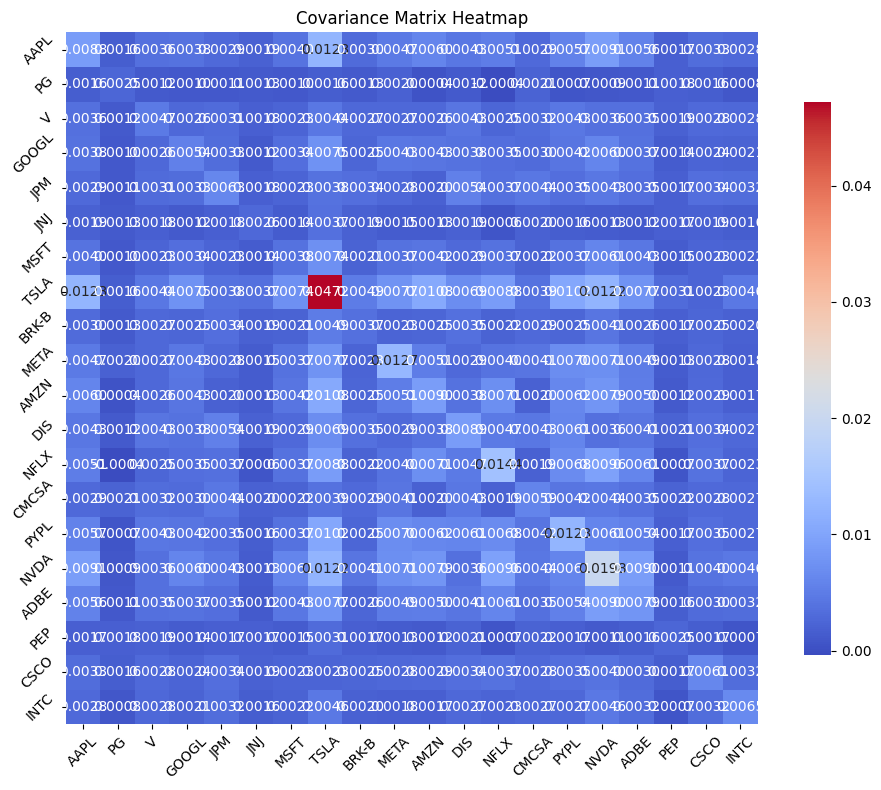

Covariance matrix saved to 'covariance_matrix.csv'.
Run 1/10
Running Basic EP with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'tournament_size': 2}


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Running Advanced EP with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'tournament_size': 2}
Running Basic ES with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'offspring_size': 100, 'tournament_size': 2}
Running Advanced ES with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'offspring_size': 100, 'tournament_size': 2}
Running (μ + λ) ES with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'mu': 50, 'lambda_': 100, 'tournament_size': 2}
Running (μ, λ) ES with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'mu': 50, 'lambda_': 100, 'tournament_size': 2}
Run 2/10
Running Basic EP with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'tournament_size': 2}
Running Advanced EP with parameters: {'max_gen': 25, 'mutation_rate': 0.01, 'sigma': 0.01, 'population_size': 50, 'tournament_size':

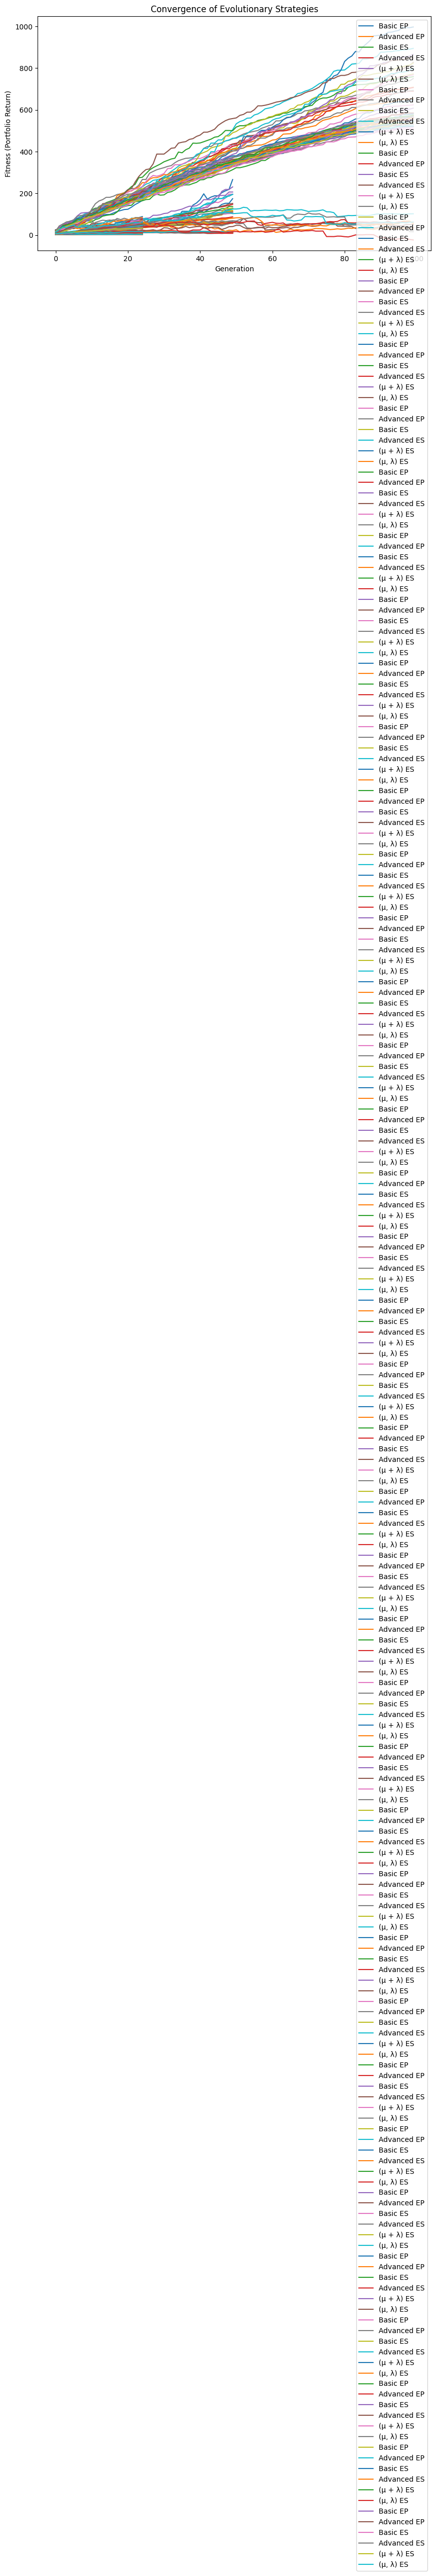

Data for Basic EP is not in the expected format: [24, [6.11440697508501, 7.928008884561699, 10.533767655849367, 12.124954016802636, 13.929376890610373, 16.11454450384565, 18.73953184388698, 24.3665776458301, 24.920562377156944, 26.198846220582276, 29.29483709720285, 33.23480347922557, 34.36019209910421, 39.06091401050912, 41.458764377056, 50.180023256151614, 50.68132075295013, 60.32005464382368, 63.08844384439141, 65.13023853739124, 69.20073270541054, 73.1036088834097, 84.01451125233451, 83.87257622126664, 88.78744451377115], 24, [5.628248538280196, 7.729059577358077, 7.666895566911633, 8.903633103890446, 10.747172878121473, 12.92646734457876, 13.547952405629307, 16.020662410985697, 17.157847293610697, 18.56336916281389, 20.059395947152314, 23.194539200234388, 25.211231854656365, 25.211231854656365, 29.93753291917393, 30.870536381319752, 34.445895457301496, 40.3993930909585, 48.061678383182, 50.493243231266554, 56.60324809413465, 60.802525240354235, 70.70316089783624, 72.35985381558888

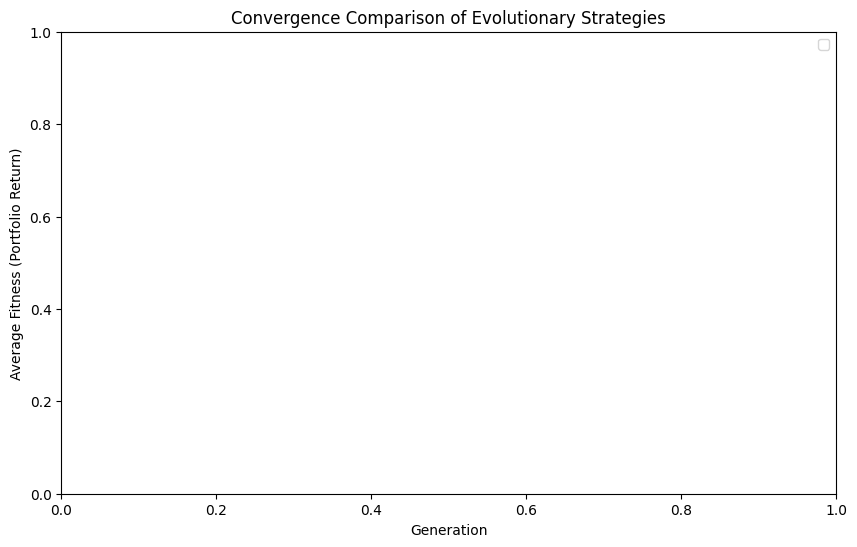

Convergence and stability results saved to CSV files.

Stability Analysis Results:
      Strategy  Average Final Fitness  Stability (Std Dev)
0     Basic EP              69.945860             8.810363
1  Advanced EP              65.900419            11.751983
2     Basic ES              33.521200             1.858638
3  Advanced ES              33.827506             2.294805
4   (μ + λ) ES              33.567865             1.708149
5    (μ, λ) ES              13.394708             2.427676

Summary of All Results:
        Strategy  Best Fitness  Mutation Rate  Sigma  Max Generations  \
0       Basic EP      6.650898           0.01   0.01               25   
1    Advanced EP      9.891211           0.01   0.01               25   
2       Basic ES      6.439939           0.01   0.01               25   
3    Advanced ES      6.017909           0.01   0.01               25   
4     (μ + λ) ES      6.415965           0.01   0.01               25   
..           ...           ...           

In [ ]:
import random
import pandas as pd
import numpy as np
from deap import base, creator, tools
import yfinance as yf
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Step 1: Define the number of assets
number_of_assets = 20

# Example stock tickers
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META',
          'TSLA', 'BRK-B', 'JPM', 'JNJ', 'V',
          'PG', 'DIS', 'NFLX', 'NVDA', 'PYPL',
          'INTC', 'CMCSA', 'PEP', 'ADBE', 'CSCO']



# Specify the output directory and date range
output_dir = '/content/drive/MyDrive/stock'  # Update this path
start_date = "2018-01-01"
end_date = "2022-12-31"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Download and save the stock data
for stock in stocks:
    stock_data = yf.download(stock, start=start_date, end=end_date)
    # Reset index to have 'Date' as a regular column
    stock_data.reset_index(inplace=True)
    # Select only the specified columns
    stock_data = stock_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    # Save to CSV
    stock_data.to_csv(f"{output_dir}/{stock}.csv", index=False)

data_directory = '/content/drive/MyDrive/stock'  # Update this path

def load_data(directory):
    stock_data = {}
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            stock_name = filename.split('.')[0]
            file_path = os.path.join(directory, filename)
            # Read CSV file, set 'Date' as index, and sort by date
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date').sort_index()
            # Convert 'Close' column to numeric, coercing errors to NaN, then drop NaN values
            df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
            df = df.dropna(subset=['Close'])
            # Store only 'Close' column in dictionary with stock ticker as key
            stock_data[stock_name] = df['Close']

    # Combine all stocks into one DataFrame with 'Date' as common index
    all_data = pd.DataFrame(stock_data)

    # Reindex with the full date range (min to max dates across all data)
    full_date_range = pd.date_range(all_data.index.min(), all_data.index.max(), freq='D')
    all_data = all_data.reindex(full_date_range).sort_index().ffill()

    return all_data


# Load the data (update the directory path as needed)
#data_directory = '/content/drive/MyDrive/stock'  # Replace with your directory
data = load_data(data_directory)
# Load the stock data
data = load_data(data_directory)


# Step 3: Calculate monthly returns
monthly_returns = data.resample('ME').ffill().pct_change().dropna()

# Step 4: Calculate Covariance Matrix
covariance_matrix = monthly_returns.cov()

plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, fmt='.4f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Covariance Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, save the covariance matrix to a CSV
covariance_matrix.to_csv('covariance_matrix.csv')
print("Covariance matrix saved to 'covariance_matrix.csv'.")

# Step 5: Define Fitness and Individual classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximize return
creator.create("Individual", list, fitness=creator.FitnessMax)

# Step 6: Function to initialize an individual
def init_individual():
    individual = [random.random() for _ in range(number_of_assets)]
    total_weight = sum(individual)
    individual = [w / total_weight for w in individual]
    return individual

# Step 7: Register toolbox functions
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, init_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Step 8: Define the evaluation functions
def sharpe_ratio(weights):
    weights = np.array(weights)  # Convert to numpy array
    if weights.shape != (number_of_assets,):
        raise ValueError(f"Expected weights shape {number_of_assets}, but got {weights.shape}")

    portfolio_return = np.dot(monthly_returns.mean().values, weights) * 252  # Annualized return
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix.values * 252, weights)))  # Annualized volatility

    if portfolio_std == 0:  # Prevent division by zero
        return -np.inf,  # Return a very low fitness value if the risk is zero

    return (portfolio_return - 0.01) / portfolio_std,  # Assume risk-free rate of 1%
def sortino_ratio(weights):
    weights = np.array(weights)
    if weights.shape != (number_of_assets,):
        raise ValueError(f"Expected weights shape {number_of_assets}, but got {weights.shape}")

    portfolio_return = np.dot(monthly_returns.mean().values, weights) * 252  # Annualized return
    downside_returns = monthly_returns[monthly_returns < 0].mean().values
    downside_std = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix.values * 252, weights)))  # Annualized downside risk

    if downside_std == 0:  # Prevent division by zero
        return -np.inf,  # Return a very low fitness value if the risk is zero

    return (portfolio_return - 0.01) / downside_std,  # Assume risk-free rate of 1%

def portfolio_return(weights):
    weights = np.array(weights)
    if weights.shape != (number_of_assets,):
        raise ValueError(f"Expected weights shape {number_of_assets}, but got {weights.shape}")

    return np.dot(monthly_returns.mean().values, weights) * 252,  # Annualized return



# Register evaluation functions for different strategies
toolbox.register("evaluate_sharpe", sharpe_ratio)
toolbox.register("evaluate_sortino", sortino_ratio)
toolbox.register("evaluate_return", portfolio_return)

toolbox.register("mate", tools.cxBlend, alpha=0.5)

# Step 9: Adaptive Mutation Rate Function
def adaptive_mutation_rate(current_gen, max_gen, min_rate=0.01, max_rate=0.5):
    return max_rate - (max_rate - min_rate) * (current_gen / max_gen)

# Mutation function with adaptive sigma
def mutate(individual, gen, max_gen, sigma):
    mutation_rate = adaptive_mutation_rate(gen, max_gen)
    return tools.mutGaussian(individual, mu=0, sigma=sigma, indpb=mutation_rate)

toolbox.register("mutate", mutate)
toolbox.register("select", tools.selTournament, tournsize=3)

# Step 10: Basic Evolutionary Programming (EP)
def run_basic_ep(max_gen=25, mutation_rate=0.2, sigma=0.1, population_size=50, tournament_size=3):
    population = toolbox.population(n=population_size)
    #stats = {'gen': [], 'max': []}
    stats = {'gen': [], 'max': [], 'weights': []}

    # Evaluate initial population using portfolio Return
    fitnesses = list(map(toolbox.evaluate_return, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.5:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutation_rate:
                toolbox.mutate(mutant, gen, max_gen, sigma)
                del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate_return, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Replace the old population by offspring
        population[:] = offspring

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)
        best_individual = tools.selBest(population, 1)[0]  # Select the best individual
        stats['weights'] = list(best_individual)  # Assuming `best_individual` contains weight attributes

    return stats

# Repeat similar structures for Advanced EP, Basic ES, Advanced ES, and other strategies
# Here is one example for Advanced Evolutionary Programming (EP)
def run_advanced_ep(max_gen=25, mutation_rate=0.2, sigma=0.1, population_size=50, tournament_size=3):
    population = toolbox.population(n=population_size)
    #stats = {'gen': [], 'max': []}
    stats = {'gen': [], 'max': [], 'weights': []}

    fitnesses = list(map(toolbox.evaluate_return, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Selection with elitism
        offspring = tools.selBest(population, k=10) + toolbox.select(population, len(population)-10)
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < 0.5:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutation_rate:
                toolbox.mutate(mutant, gen, max_gen, sigma)
                del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate_return, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        population[:] = offspring

        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)
        best_individual = tools.selBest(population, 1)[0]  # Select the best individual
        stats['weights'] = list(best_individual)  # Assuming `best_individual` contains weight attributes

    return stats


    # Step 12: Basic Evolutionary Strategies (ES)
def run_basic_es(max_gen=25, mutation_rate=0.2, sigma=0.1, population_size=50, offspring_size=100, tournament_size=3):
    toolbox.register("select", tools.selTournament, tournsize=tournament_size)  # Set tournament size
    population = toolbox.population(n=population_size)
    #stats = {'gen': [], 'max': []}
    stats = {'gen': [], 'max': [], 'weights': []}

    # Evaluate initial population
    fitnesses = list(map(toolbox.evaluate_return, population))
   # fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Create offspring
        offspring = tools.selRandom(population, offspring_size)
        offspring = list(map(toolbox.clone, offspring))

        for mutant in offspring:
            toolbox.mutate(mutant, gen, max_gen, sigma)
            del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
       # fitnesses = map(toolbox.evaluate, invalid_ind)
        fitnesses = map(toolbox.evaluate_return, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation from parents and offspring
        population = tools.selBest(population + offspring, population_size)

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)
        best_individual = tools.selBest(population, 1)[0]  # Select the best individual
        stats['weights'] = list(best_individual)  # Assuming `best_individual` contains weight attributes

    return stats

# Step 13: Advanced Evolutionary Strategies (ES)
def run_advanced_es(max_gen=25, mutation_rate=0.2, sigma=0.1, population_size=50, offspring_size=100, tournament_size=3):
    toolbox.register("select", tools.selTournament, tournsize=tournament_size)  # Set tournament size
    population = toolbox.population(n=population_size)
   # stats = {'gen': [], 'max': []}
    stats = {'gen': [], 'max': [], 'weights': []}

    # Evaluate initial population
   # fitnesses = list(map(toolbox.evaluate, population))

    fitnesses = list(map(toolbox.evaluate_return, population))

    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Create offspring
        offspring = tools.selRandom(population, offspring_size)
        offspring = list(map(toolbox.clone, offspring))

        for mutant in offspring:
            toolbox.mutate(mutant, gen, max_gen, sigma)
            del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
       #fitnesses = map(toolbox.evaluate, invalid_ind)
        fitnesses = map(toolbox.evaluate_return, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation from parents and offspring
        population = tools.selBest(population + offspring, population_size)

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)
        best_individual = tools.selBest(population, 1)[0]
        stats['weights'] = list(best_individual)

    return stats

# Step 14: (μ + λ) Evolutionary Strategies
def run_mu_plus_lambda_es(max_gen=25, mutation_rate=0.2, sigma=0.1, mu=50, lambda_=100, tournament_size=3):
    toolbox.register("select", tools.selTournament, tournsize=tournament_size)  # Set tournament size
    population = toolbox.population(n=mu)
    #stats = {'gen': [], 'max': []}
    stats = {'gen': [], 'max': [], 'weights': []}
    # Evaluate initial population
    #fitnesses = list(map(toolbox.evaluate, population))
    fitnesses = list(map(toolbox.evaluate_return, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Create offspring
        offspring = tools.selRandom(population, lambda_)
        offspring = list(map(toolbox.clone, offspring))

        for mutant in offspring:
            toolbox.mutate(mutant, gen, max_gen, sigma)  # Use the passed sigma
            del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
      # fitnesses = map(toolbox.evaluate, invalid_ind)
        fitnesses = map(toolbox.evaluate_return, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation from parents and offspring
        population = tools.selBest(population + offspring, mu)

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)
        best_individual = tools.selBest(population, 1)[0]
        stats['weights'] = list(best_individual)

    return stats

# Step 15: (μ, λ) Evolutionary Strategies
def run_mu_comma_lambda_es(max_gen=25, mutation_rate=0.2, sigma=0.1, mu=50, lambda_=100, tournament_size=3):
    toolbox.register("select", tools.selTournament, tournsize=tournament_size)  # Set tournament size
    population = toolbox.population(n=mu)
    #stats = {'gen': [], 'max': []}
    stats = {'gen': [], 'max': [], 'weights': []}
    # Evaluate initial population
   # fitnesses = list(map(toolbox.evaluate, population))
    fitnesses = list(map(toolbox.evaluate_return, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    for gen in range(max_gen):
        # Create offspring
        offspring = tools.selRandom(population, lambda_)
        offspring = list(map(toolbox.clone, offspring))

        for mutant in offspring:
            toolbox.mutate(mutant, gen, max_gen, sigma)  # Use the passed sigma
            del mutant.fitness.values

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
      # fitnesses = map(toolbox.evaluate, invalid_ind)
        fitnesses = map(toolbox.evaluate_return, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # Select the next generation only from offspring
        population[:] = offspring

        # Store stats
        fits = [ind.fitness.values[0] for ind in population]
        max_fit = max(fits)
        stats['gen'].append(gen)
        stats['max'].append(max_fit)
        best_individual = tools.selBest(population, 1)[0]
        stats['weights'] = list(best_individual)

    return stats


# Step 14: Load parameters from CSV
params_df = pd.read_csv('/content/drive/MyDrive/parametersold.csv')  # Replace with your CSV path

# Step 15: Experimentation Loop with Convergence and Stability Tracking
results = []
results1 = []
convergence_data = {}  # Track convergence for each strategy
stability_data = {}    # Track final fitness values for each strategy

num_runs = 10  # Number of times to run each strategy

# Iterate over parameters from the CSV file
for index, row in params_df.iterrows():
    mutation_rate = row['mutation_rate']
    sigma = row['sigma']
    max_gen = int(row['max_gen'])
    population_size = int(row['population_size'])
    offspring_size = int(row['offspring_size'])
    tournament_size = int(row['tournament_size'])

    strategies = [
        ("Basic EP", run_basic_ep, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "population_size": population_size, "tournament_size": tournament_size}),
        ("Advanced EP", run_advanced_ep, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "population_size": population_size, "tournament_size": tournament_size}),
        ("Basic ES", run_basic_es, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "population_size": population_size, "offspring_size": offspring_size, "tournament_size": tournament_size}),
        ("Advanced ES", run_advanced_es, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "population_size": population_size, "offspring_size": offspring_size, "tournament_size": tournament_size}),
        ("(μ + λ) ES", run_mu_plus_lambda_es, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "mu": population_size, "lambda_": offspring_size, "tournament_size": tournament_size}),
        ("(μ, λ) ES", run_mu_comma_lambda_es, {"max_gen": max_gen, "mutation_rate": mutation_rate, "sigma": sigma, "mu": population_size, "lambda_": offspring_size, "tournament_size": tournament_size})
    ]


    # Initialize lists for stability and convergence tracking
    for label, _, _ in strategies:
        convergence_data[label] = []
        stability_data[label] = []

    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs}")

        for label, strategy_func, params in strategies:
            print(f"Running {label} with parameters: {params}")

            stats = strategy_func(**params)  # Unpack parameters specific to each function
            max_fitness = stats['max'][-1]
            results.append((stats, label, mutation_rate, sigma, max_gen, population_size, offspring_size, tournament_size))
            results1.append({
                "Strategy": label,
                "Run": run + 1,
                "Mutation Rate": mutation_rate,
                "Sigma": sigma,
                "Max Generations": max_gen,
                "Population Size": population_size,
                "Offspring Size": offspring_size,
                "Tournament Size": tournament_size,
                "Weights": stats['weights'],  # This will capture weights from each strategy
                "Convergence": stats['max'],  # Entire convergence list
                "Final Fitness": stats['max'][-1]  # Final fitness value in the convergence data
            })

            # Record convergence: generation count to reach a threshold
            threshold = max_fitness * 0.95
            converged_gen = next((gen for gen, fit in enumerate(stats['max']) if fit >= threshold), max_gen)
            convergence_data[label].append(converged_gen)

            # Track convergence for this run
            convergence_data[label].append(stats['max'])
            # Track final fitness for stability
            stability_data[label].append(stats['max'][-1])

# After all runs, calculate stability as standard deviation of final fitness
for label in stability_data:
    stability_metric = np.std(stability_data[label])

results1_df = pd.DataFrame(results1)
results1_df.to_csv("return_results1.csv", index=False)
for strategy in results1_df['Strategy'].unique():
    strategy_df = results1_df[results1_df['Strategy'] == strategy]
    strategy_file_name = f"{strategy.replace(' ', '_')}_return_results1.csv"
    strategy_df.to_csv(strategy_file_name, index=False)
    print(f"Results for {strategy} saved to {strategy_file_name}")



# Step 18: Plot results for each strategy
def plot_convergence(stats, label):
    plt.plot(stats['gen'], stats['max'], label=label)

plt.figure(figsize=(10, 6))
for result in results:
    stats, label, mutation_rate, sigma, max_gen, population_size, offspring_size, tournament_size = result
    plot_convergence(stats, label)
# Convert result to a DataFrame
df = pd.DataFrame(results)

# Save to a CSV file
df.to_csv("results.csv", index=False)

plt.title('Convergence of Evolutionary Strategies')
plt.xlabel('Generation')
plt.ylabel('Fitness (Portfolio Return)')
plt.legend()
plt.show()

# Step 18: Plot Convergence Comparison
def plot_average_convergence(data, label):
    # Check if data is a list of lists/arrays
    if all(isinstance(arr, list) or isinstance(arr, np.ndarray) for arr in data):
        # Find minimum length for consistent array lengths
        min_length = min(len(arr) for arr in data)
        # Trim or pad data to make each array the same length
        trimmed_data = [arr[:min_length] for arr in data]
        # Calculate average convergence over runs
        avg_convergence = np.mean(trimmed_data, axis=0)
        plt.plot(range(len(avg_convergence)), avg_convergence, label=label)
    else:
        print(f"Data for {label} is not in the expected format: {data}")

plt.figure(figsize=(10, 6))
for label in convergence_data.keys():
    plot_average_convergence(convergence_data[label], label)

plt.title('Convergence Comparison of Evolutionary Strategies')
plt.xlabel('Generation')
plt.ylabel('Average Fitness (Portfolio Return)')
plt.legend()
plt.show()
convergence_results = []
for res in results:
    stats, label, mutation_rate, sigma, max_gen, population_size, offspring_size, tournament_size = res
    for gen, fitness in zip(stats['gen'], stats['max']):
        convergence_results.append({
            'Strategy': label,
            'Mutation Rate': mutation_rate,
            'Sigma': sigma,
            'Population Size': population_size,
            'Offspring Size': offspring_size,
            'Tournament Size': tournament_size,
            'Generation': gen,
            'Fitness': fitness
        })

convergence_df = pd.DataFrame(convergence_results)
convergence_df.to_csv('convergence_results.csv', index=False)

# Prepare DataFrame for Stability Results
stability_results = []
strategies = set([r[1] for r in results])  # Unique strategies

for strategy in strategies:
    strategy_fitness = [max(r[0]['max']) for r in results if r[1] == strategy]
    mean_fitness = pd.Series(strategy_fitness).mean()
    std_dev_fitness = pd.Series(strategy_fitness).std()
    best_fitness = max(strategy_fitness)

    stability_results.append({
        'Strategy': strategy,
        'Mean Fitness': mean_fitness,
        'Std Dev Fitness': std_dev_fitness,
        'Best Fitness': best_fitness
    })

stability_df = pd.DataFrame(stability_results)
stability_df.to_csv('stability_results.csv', index=False)

print("Convergence and stability results saved to CSV files.")

# Step 19: Stability Analysis
stability_results1 = []
for label, final_fitness_list in stability_data.items():
    avg_fitness = np.mean(final_fitness_list)
    fitness_std = np.std(final_fitness_list)  # Stability indicator (standard deviation)
    stability_results1.append({
        'Strategy': label,
        'Average Final Fitness': avg_fitness,
        'Stability (Std Dev)': fitness_std
    })

stability_df = pd.DataFrame(stability_results1)
stability_df.to_csv('stability_results1.csv', index=False)
print("\nStability Analysis Results:")
print(stability_df)

# Step 20: Summarize Results
summary_results = []
for res in results:
    stats, label, mutation_rate, sigma, max_gen, population_size, offspring_size, tournament_size = res
    best_fitness = max(stats['max'])
    summary_results.append({
        'Strategy': label,
        'Best Fitness': best_fitness,
        'Mutation Rate': mutation_rate,
        'Sigma': sigma,
        'Max Generations': max_gen,
        'Population Size': population_size,
        'Offspring Size': offspring_size,
        'Tournament Size': tournament_size
    })

summary_df = pd.DataFrame(summary_results)
stability_df.to_csv('summary_results.csv', index=False)
print("\nSummary of All Results:")
print(summary_df)
